In [182]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [183]:
df = pd.read_excel("Dataset_HPLC.xlsx", sheet_name="Dinh luong")
df = df.dropna()
df.head(5)

,No.,Name,Group,%CM,%CA,%CAL,600,602,604,606,...,3982,3984,3986,3988,3990,3992,3994,3996,3998,4000
0,1.0,21.1.8.YB-13,1.0,2.57,0.09,9.83,0.222,0.223,0.221,0.217,...,-0.006,-0.006,-0.006,-0.006,-0.006,-0.006,-0.006,-0.006,-0.006,-0.006
1,2.0,21.1.8.YB-24,1.0,0.69,0.04,3.75,0.263,0.261,0.257,0.257,...,-0.007,-0.007,-0.007,-0.007,-0.006,-0.007,-0.007,-0.007,-0.007,-0.007
2,3.0,21.1.8.YB-38,1.0,0.43,0.05,5.53,0.252,0.253,0.253,0.252,...,-0.006,-0.007,-0.007,-0.007,-0.006,-0.007,-0.007,-0.007,-0.007,-0.007
3,4.0,21.1.8.YB-40,1.0,2.04,0.06,5.21,0.259,0.258,0.259,0.259,...,-0.008,-0.009,-0.009,-0.009,-0.008,-0.008,-0.008,-0.009,-0.009,-0.009
4,5.0,21.1.8.YB-41,1.0,0.13,0.09,4.60,0.206,0.203,0.200,0.198,...,0.000,-0.001,0.000,0.001,0.001,0.000,0.000,-0.001,-0.001,-0.001


In [184]:
X = df.iloc[:, 6:]
y = df.iloc[:, 5]

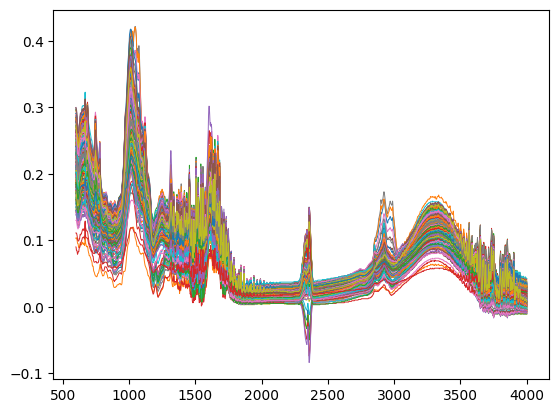

In [185]:
plt.plot(X.T, linewidth = 0.7)
plt.show()

In [186]:
def snv(input):
    output = np.zeros_like(input)
    for i in range(input.shape[0]):
        output[i, :] = (input[i, :] - np.mean(input[i, :])) / np.std(input[i, :])
    return output

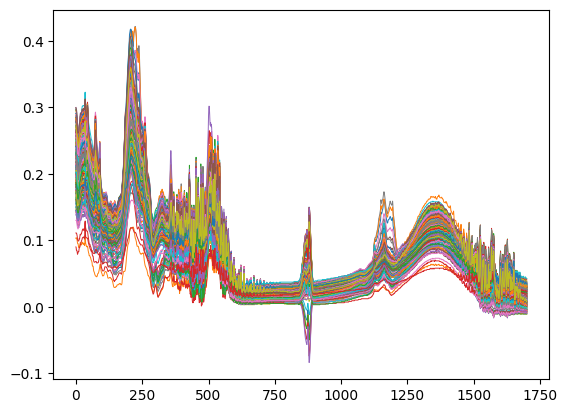

In [187]:
Xsnv = X.values
plt.plot(Xsnv.T, linewidth = 0.7)
plt.show()

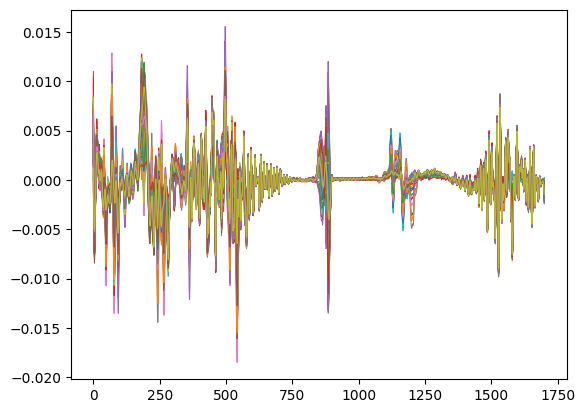

In [188]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.signal import savgol_filter

X_deriv = savgol_filter(X, window_length=25, polyorder=5, deriv=1)
plt.plot(X_deriv.T, linewidth = 0.7)
plt.show()

In [189]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_deriv, y, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 1701), (69, 1701), (160,), (69,))

In [190]:
# def SPA(X, k):
#     n_samples, n_features = X.shape
#     selected_features = []
#     selected_features.append(0)

#     first_feature = 0

#     for i in range(k):
#         remain_features = [i for i in range (n_features) if i != first_feature]
#         selected_matric = X[:, selected_features]
#         remain_matrix = 

In [191]:
from auswahl import SPA, VIP

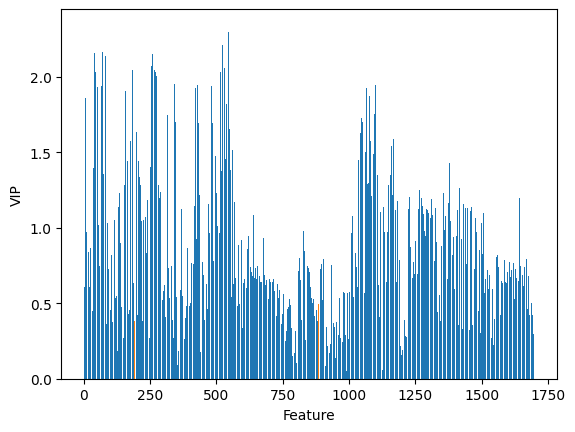

In [192]:
np.random.seed(1337)
X = X_train
y = y_train

vip = VIP()
spa = SPA(n_features_to_select=8)

vip.fit(X, y)

# Mask all features with a VIP score below a threshold
mask = vip.vips_ > 0.1
# Call SPA on masked data
spa.fit(X, y, mask=mask)

colors = np.full(X.shape[1], fill_value='C00')
colors[spa.get_support()] = 'C01'

plt.bar(x=np.arange(X.shape[1]), height=vip.vips_, color=colors)

plt.xlabel('Feature')
plt.ylabel('VIP')

plt.show()

In [193]:
spa.best_model_

PLSRegression()

In [198]:
k = 36
sorted_indices = np.argsort(vip.vips_)
X_train_spa = X_train[:, sorted_indices[-k:]]
X_test_spa = X_test[:, sorted_indices[-k:]]

In [199]:
scaler = MinMaxScaler()
X_train_spa = scaler.fit_transform(X_train_spa)
X_test_spa = scaler.transform(X_test_spa)

In [233]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV
lr = PLSRegression()
param_grid = {
    'n_components': [5, 10, 15, 20, 25]
}
grid = GridSearchCV(estimator=lr, cv = 10, scoring='neg_root_mean_squared_error', verbose=1, param_grid=param_grid)
grid.fit(X_train_spa, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


GridSearchCV(cv=10, estimator=PLSRegression(),
             param_grid={'n_components': [5, 10, 15, 20, 25]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [234]:
grid.best_params_

{'n_components': 10}

In [235]:
grid.best_estimator_

PLSRegression(n_components=10)

In [236]:
model = grid.best_estimator_
y_pred = model.predict(X_test_spa)

r2: 0.468162962272605


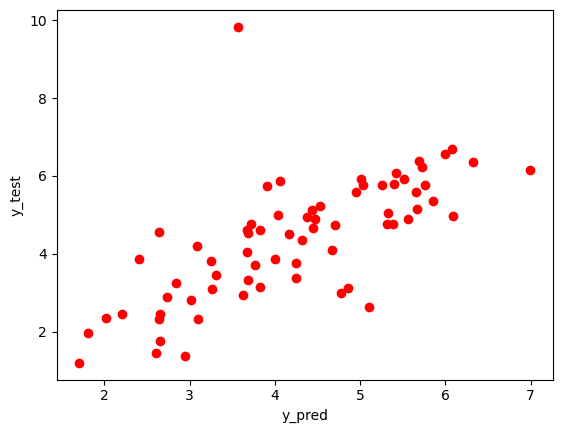

In [237]:
from sklearn.metrics import r2_score
print("r2:",r2_score(y_test, y_pred))
plt.scatter(y_pred, y_test, c = 'r')
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()